In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 10)
y = np.random.normal(0, 1, 10)
X = np.vstack((x, y)).T


https://datascienceplus.com/understanding-the-covariance-matrix/
    

In [5]:
x

array([ 0.44617001, -0.36483407,  1.79122602,  1.66625757,  0.93752399,
        1.84436593, -0.11365349,  0.60302818,  0.59086305,  0.40126071])

In [6]:
y

array([-1.15741495,  1.73522073, -1.24390591,  0.88153037, -0.79202897,
        0.75131138,  0.83538649, -0.21465882,  0.25652168,  1.94930269])

In [7]:
X


array([[ 0.44617001, -1.15741495],
       [-0.36483407,  1.73522073],
       [ 1.79122602, -1.24390591],
       [ 1.66625757,  0.88153037],
       [ 0.93752399, -0.79202897],
       [ 1.84436593,  0.75131138],
       [-0.11365349,  0.83538649],
       [ 0.60302818, -0.21465882],
       [ 0.59086305,  0.25652168],
       [ 0.40126071,  1.94930269]])

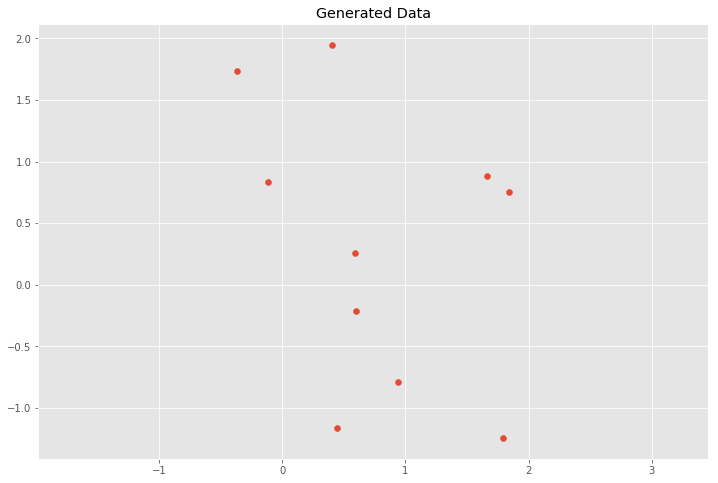

In [8]:

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal');

In [9]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])


In [10]:

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[ 0.599662  , -0.3219862 ],
       [-0.3219862 ,  1.28617235]])

In [11]:
# Center the matrix at the origin
X = X - np.mean(X, 0)



In [12]:
X

array([[-0.33405078, -1.45754142],
       [-1.14505486,  1.43509426],
       [ 1.01100523, -1.54403238],
       [ 0.88603678,  0.5814039 ],
       [ 0.1573032 , -1.09215544],
       [ 1.06414514,  0.45118491],
       [-0.89387428,  0.53526002],
       [-0.17719261, -0.51478529],
       [-0.18935774, -0.04360479],
       [-0.37896008,  1.64917622]])

Linear Transformations of the Data Set

Next, we will look at how transformations affect our data and the covariance matrix 
C
. We will transform our data with the following scaling matrix.

 
 S= ( sx 0 
       0 sy)

where the transformation simply scales the x and y components by multiplying them by 
sx  and sy  respectively. What we expect is that the covariance matrix 
C of our transformed data set will simply be


C = (  (sx σx)^2 0
        0       (sy σy)^2 
       )
 
 which means that we can extract the scaling matrix from our covariance matrix by calculating 
S =√C
 and the data is transformed by 
Y=SX
.

array([[ 0.29383438, -0.76632715],
       [-0.76632715, 14.86815234]])

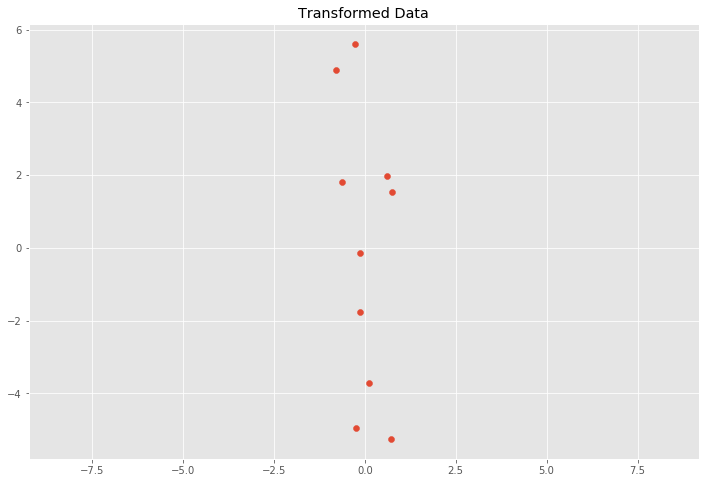

In [13]:
# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

Eigen Decomposition of the Covariance Matrix

In [ ]:
Eigen Decomposition is one connection between a linear transformation and the covariance matrix.
An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it.
It can be expressed as
Av =λv

here v  is an eigenvector of  A
 and λ  is the corresponding eigenvalue. If we put all eigenvectors into the columns of a Matrix 
V  and all eigenvalues as the entries of a diagonal matrix L
 we can write for our covariance matrix 
C the following equation
CV =VL

In [14]:
C = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C)



In [15]:
eVe

array([ 0.25365119, 14.90833553])

In [16]:
eVa

array([[-0.99862806,  0.05236414],
       [-0.05236414, -0.99862806]])

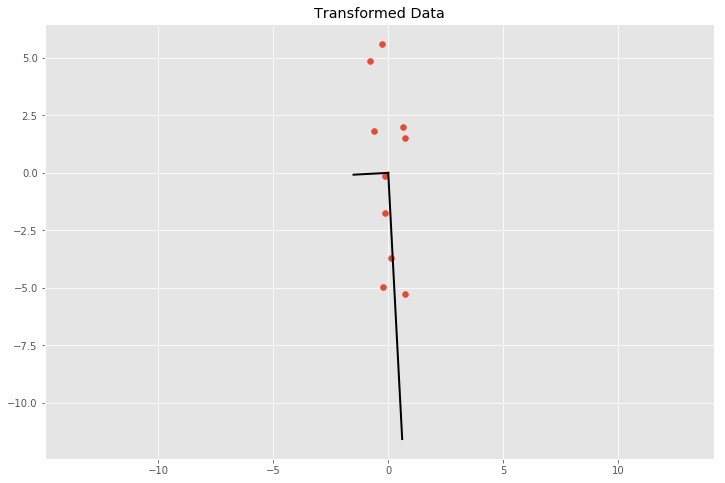

In [17]:
plt.scatter(Y[:, 0], Y[:, 1])
for e, v in zip(eVe, eVa.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], 'k-', lw=2)
plt.title('Transformed Data')
plt.axis('equal');

In [ ]:
The eigenvectors are unit vectors representing the direction of the largest variance of the data,
while the eigenvalues represent the magnitude of this variance in the corresponding directions